<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/ufr_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import MaxNLocator
import glob
import seaborn as sns

In [ ]:
!ls -ltr *.csv

-rw-r--r-- 1 root root 24109 Dec 18 21:03 DCK240C2_dmd_spply_oh_ss.csv
-rw-r--r-- 1 root root 46193 Dec 18 21:03 DNP612_dmd_spply_oh_ss.csv
-rw-r--r-- 1 root root 47057 Dec 18 21:03 DCD771C2_dmd_spply_oh_ss.csv
-rw-r--r-- 1 root root 48867 Dec 18 21:03 DCK277D2_dmd_spply_oh_ss.csv
-rw-r--r-- 1 root root 47699 Dec 18 21:03 DCB230C_dmd_spply_oh_ss.csv


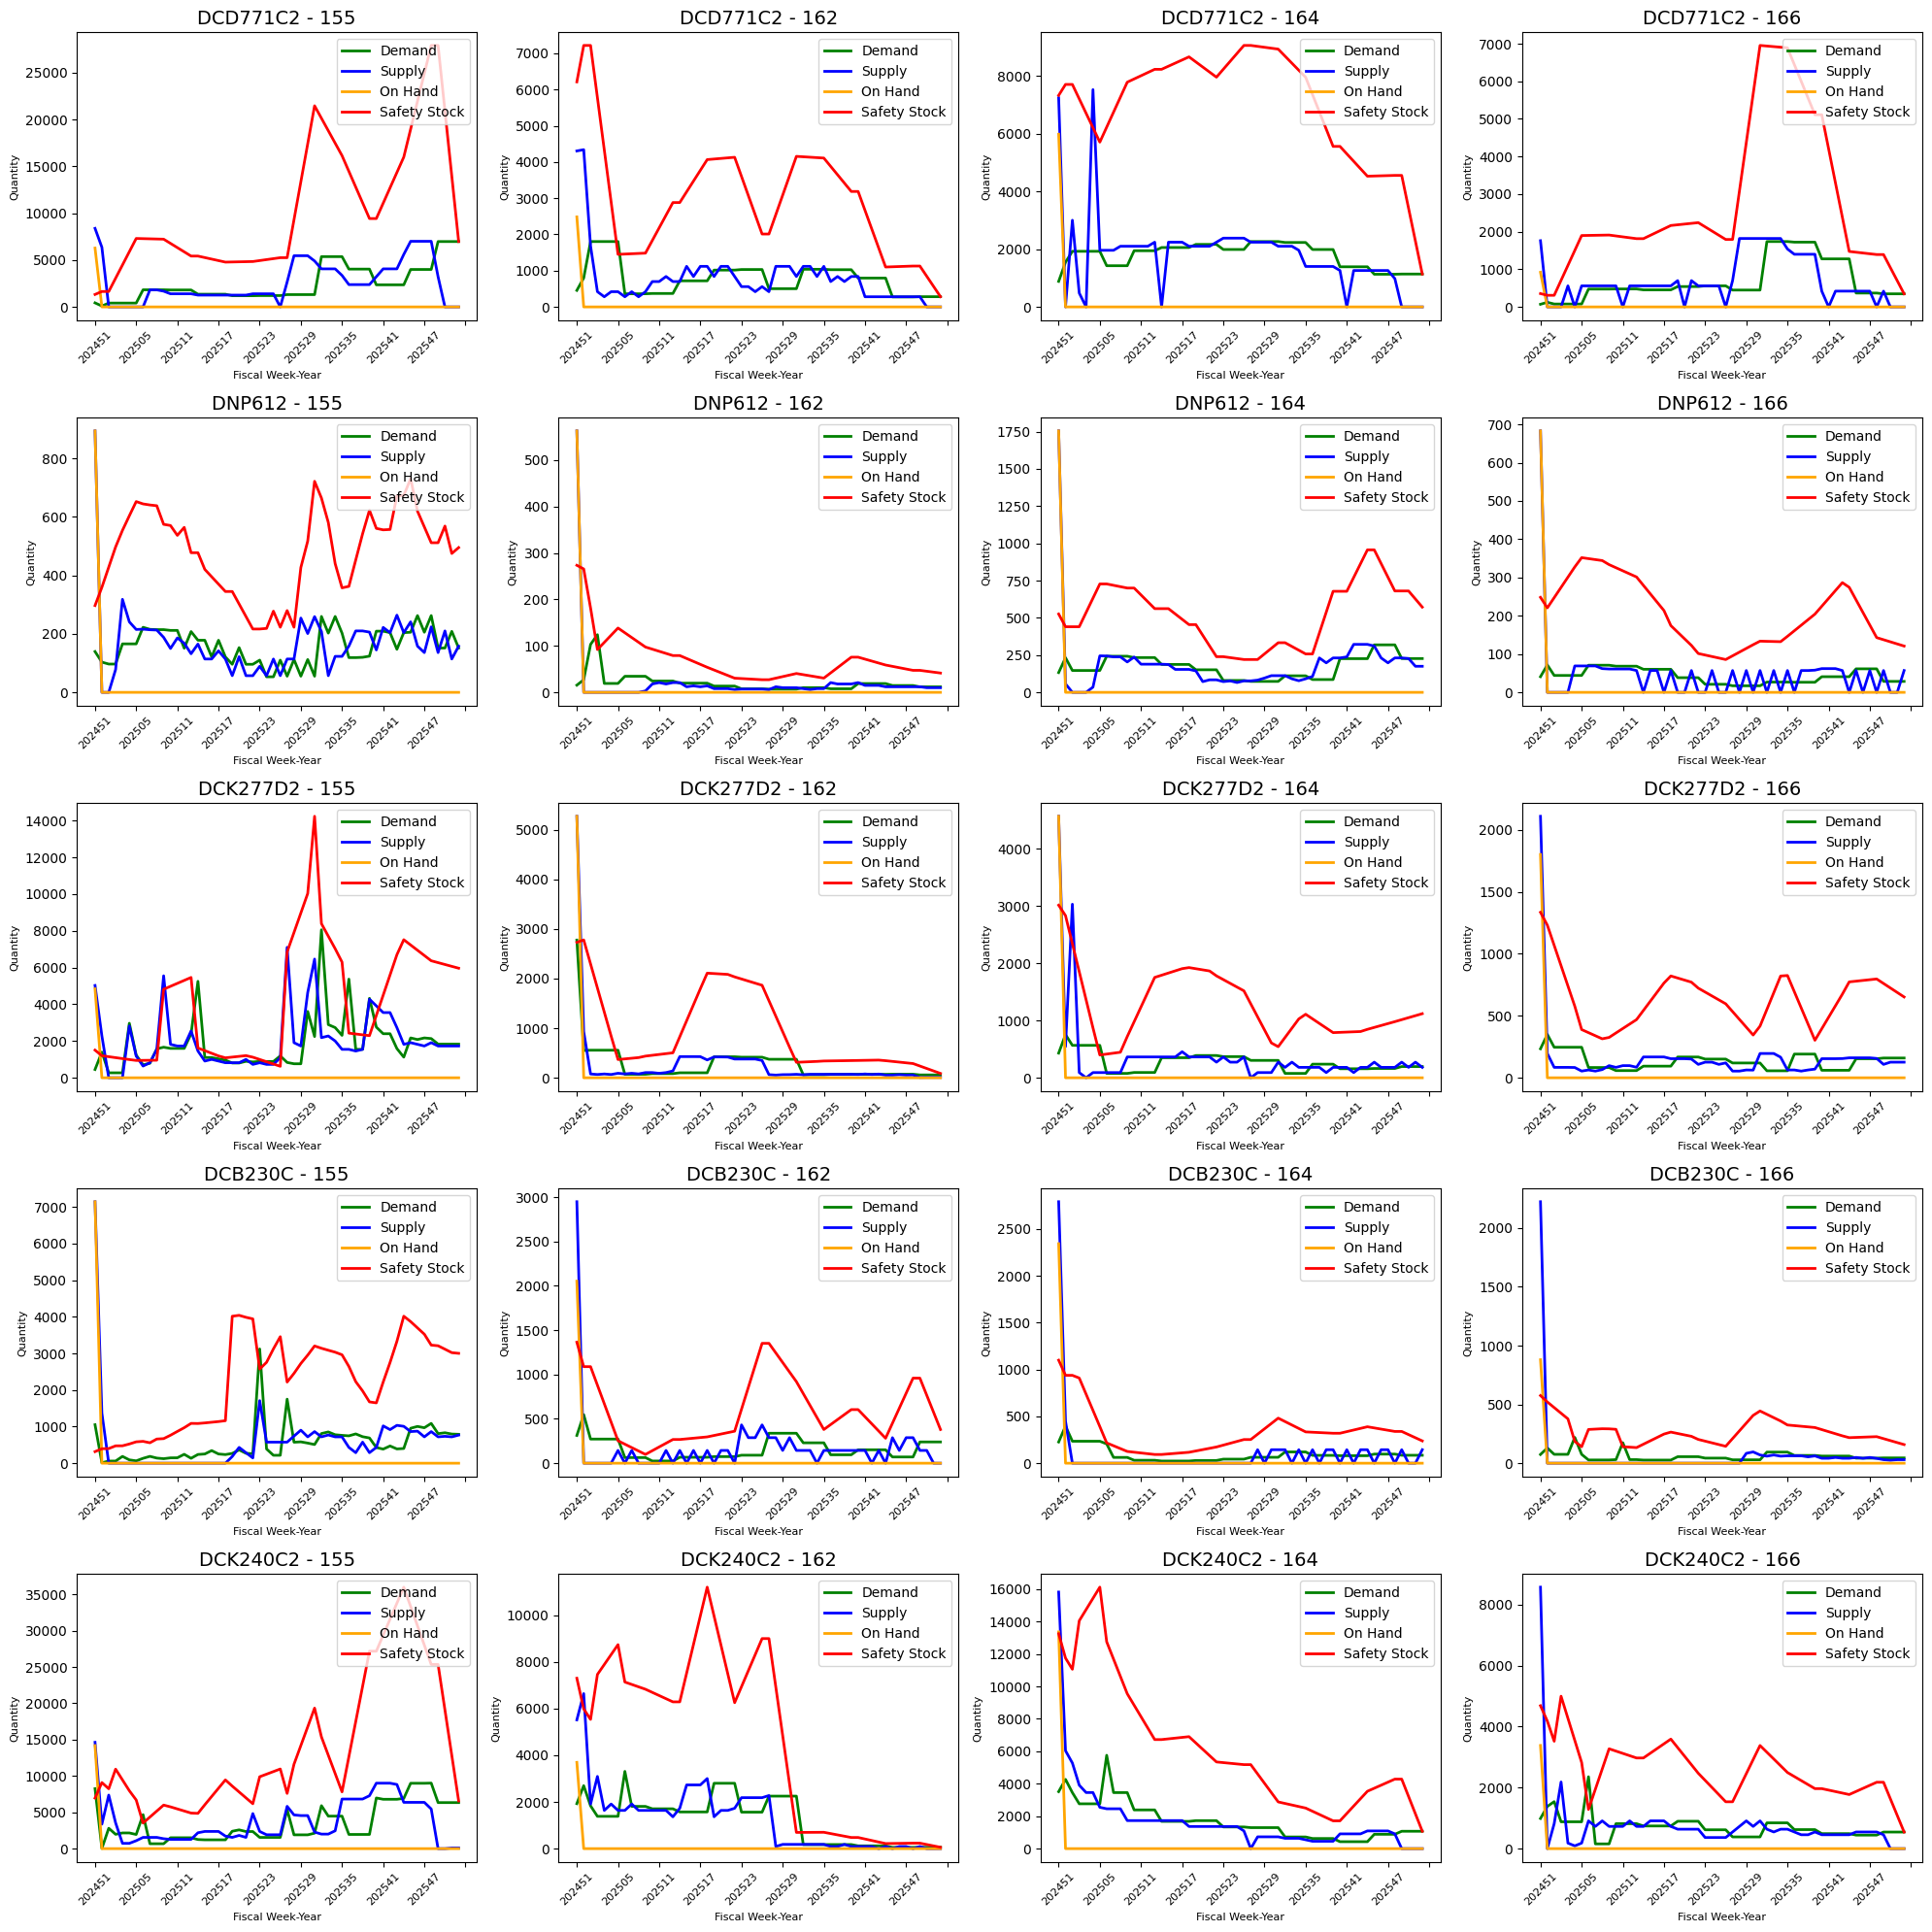

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20), sharex=False, sharey=False)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for row_idx, file in enumerate(glob.glob('*.csv')):
    data = pd.read_csv(file)
    data = data[data['FISC_WK_YR'] <= 202552]
    data['FISC_WK_YR'] = data['FISC_WK_YR'].astype(str)
    data['FISC_WK_YR_XFRM'] = data['FISC_WK_YR'].apply(lambda x: x[:4] + '-' + x[4:])

    locations = data['LOC_KEY'].unique()
    prod = data['PROD_KEY'].unique()[0]

    # Ensure the fiscal weeks are sorted
    data = data.sort_values(by=['LOC_KEY', 'FISC_WK_YR_XFRM'])

    # Create visualizations for each location
    for col_idx, loc in enumerate(locations):
        loc_data = data[data['LOC_KEY'] == loc]
        ax = axes[row_idx, col_idx]
        #plt.figure(figsize=(12, 6)) # Remove this line - creating a new figure inside the loop is not needed.

        # Plot each metric with the specified colors
        ax.plot(loc_data['FISC_WK_YR'], loc_data['TOT_DMD_QTY'], label='Demand', color='green', linewidth=2)
        ax.plot(loc_data['FISC_WK_YR'], loc_data['SUPPLY_QTY_PSI'], label='Supply', color='blue', linewidth=2)
        ax.plot(loc_data['FISC_WK_YR'], loc_data['ON_HAND_QTY'], label='On Hand', color='orange', linewidth=2)
        ax.plot(loc_data['FISC_WK_YR'], loc_data['SFTY_STK_QTY'], label='Safety Stock', color='red', linewidth=2)

        #ax.xaxis.set_major_locator(mticker.MultipleLocator(13))
        #ax.xaxis.set_minor_locator(mticker.MultipleLocator(2))
        #ax.xaxis.set_minor_formatter(mticker.NullFormatter())

        # Adding titles and labels
        ax.set_title(f'{prod} - {loc}', fontsize=14)
        ax.set_xlabel('Fiscal Week-Year', fontsize=8)
        ax.set_ylabel('Quantity', fontsize=8)
        plt.grid(False)
        ax.legend(loc="upper right")
        #plt.grid(alpha=0.3)
        ax.set_xticks(loc_data['FISC_WK_YR'])  # Set ticks to the fiscal week-year values
        #plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # Rotate the labels
        # Reduce the number of ticks
        ax.xaxis.set_major_locator(MaxNLocator(nbins=10))  # Show up to 10 ticks

        # Rotate x-axis labels and adjust alignment
        ax.tick_params(axis='x', labelrotation=45, labelsize=8)

        # Show plot for the current location
        #ax.tight_layout() # Incorrect: tight_layout is called on the Figure object

    # Call tight_layout after plotting on all subplots:
    fig.tight_layout()
plt.show()